# Getting started with Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Create publication quality plots

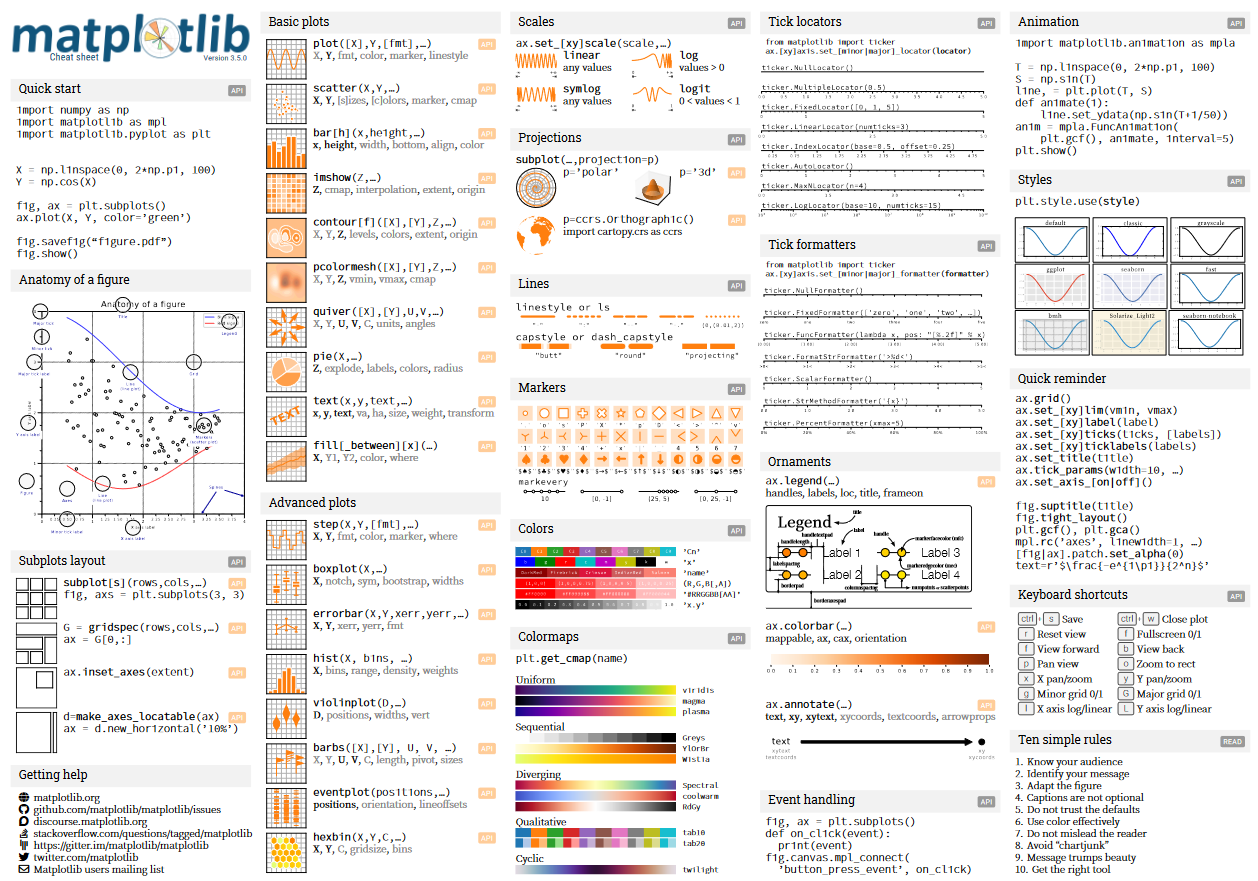
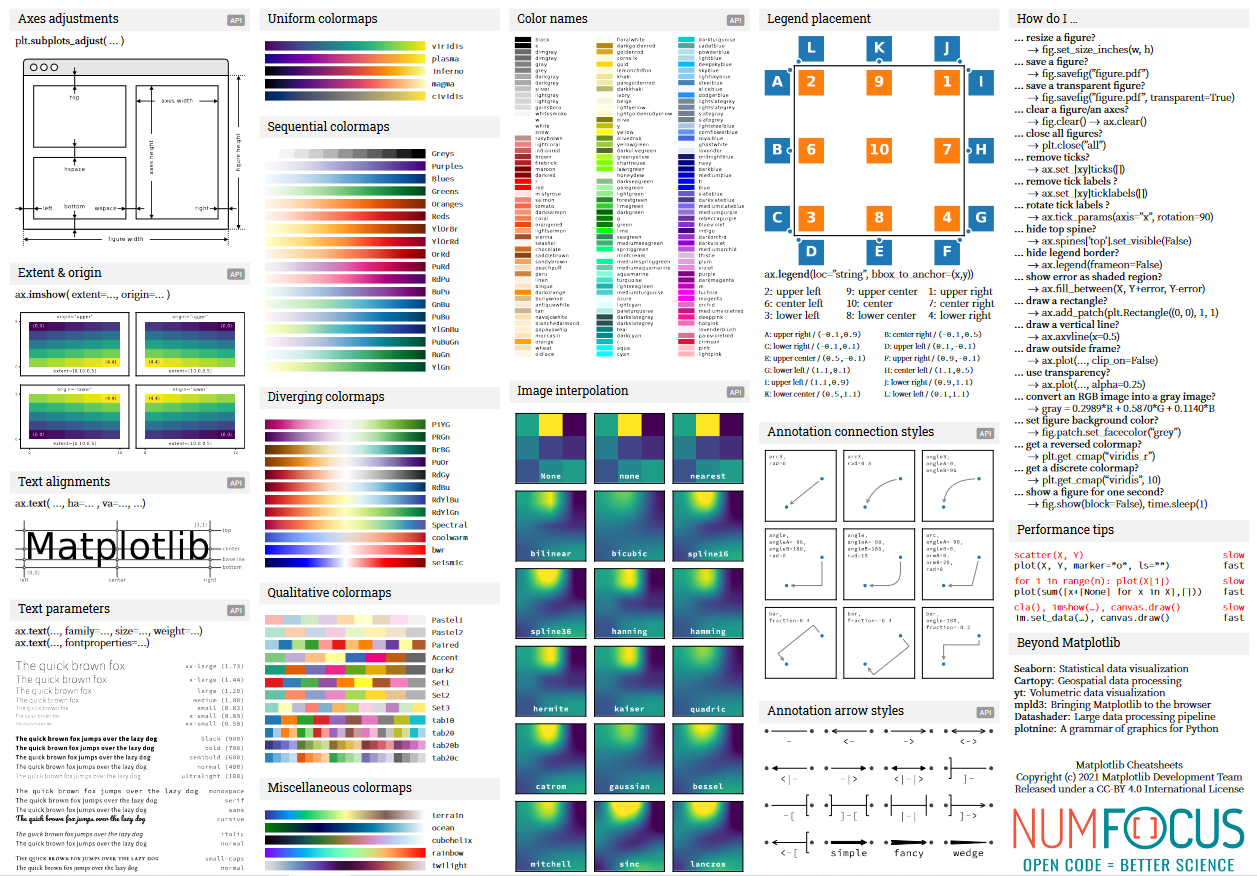
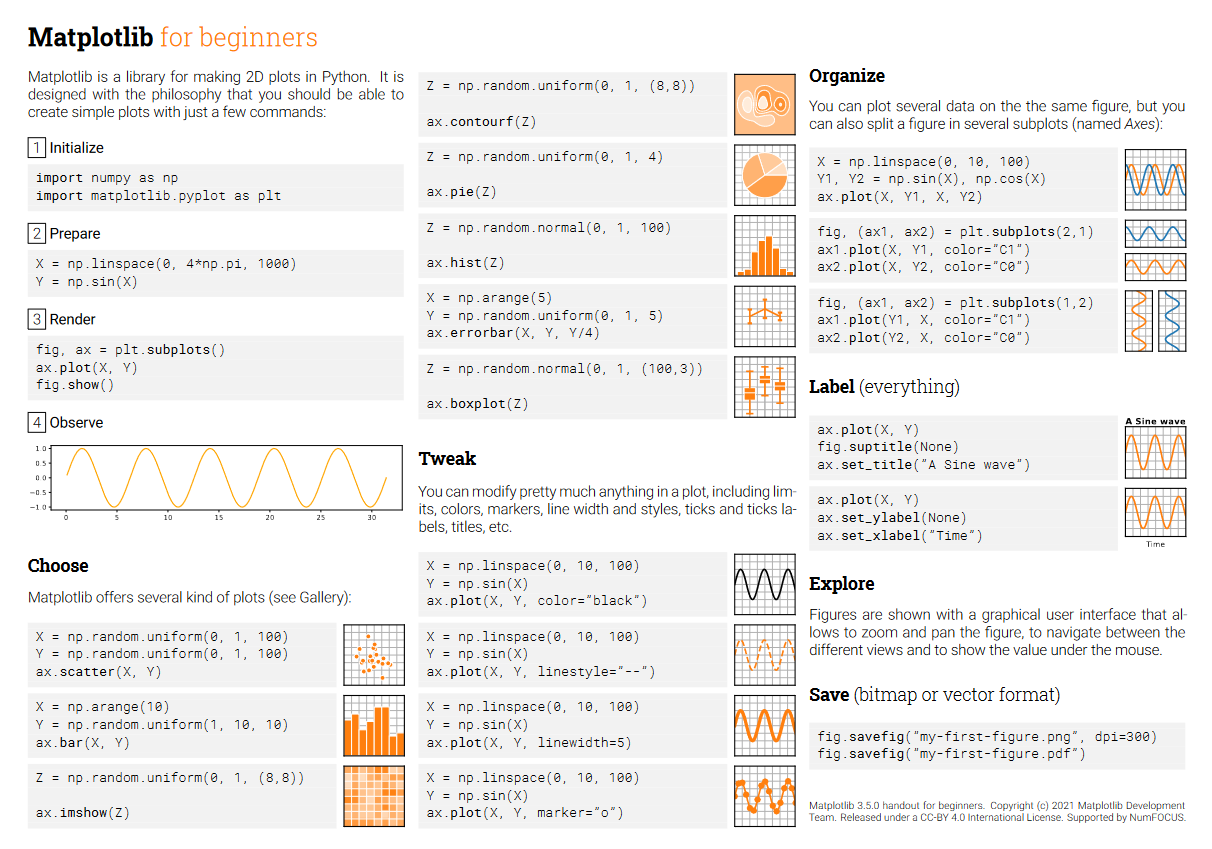
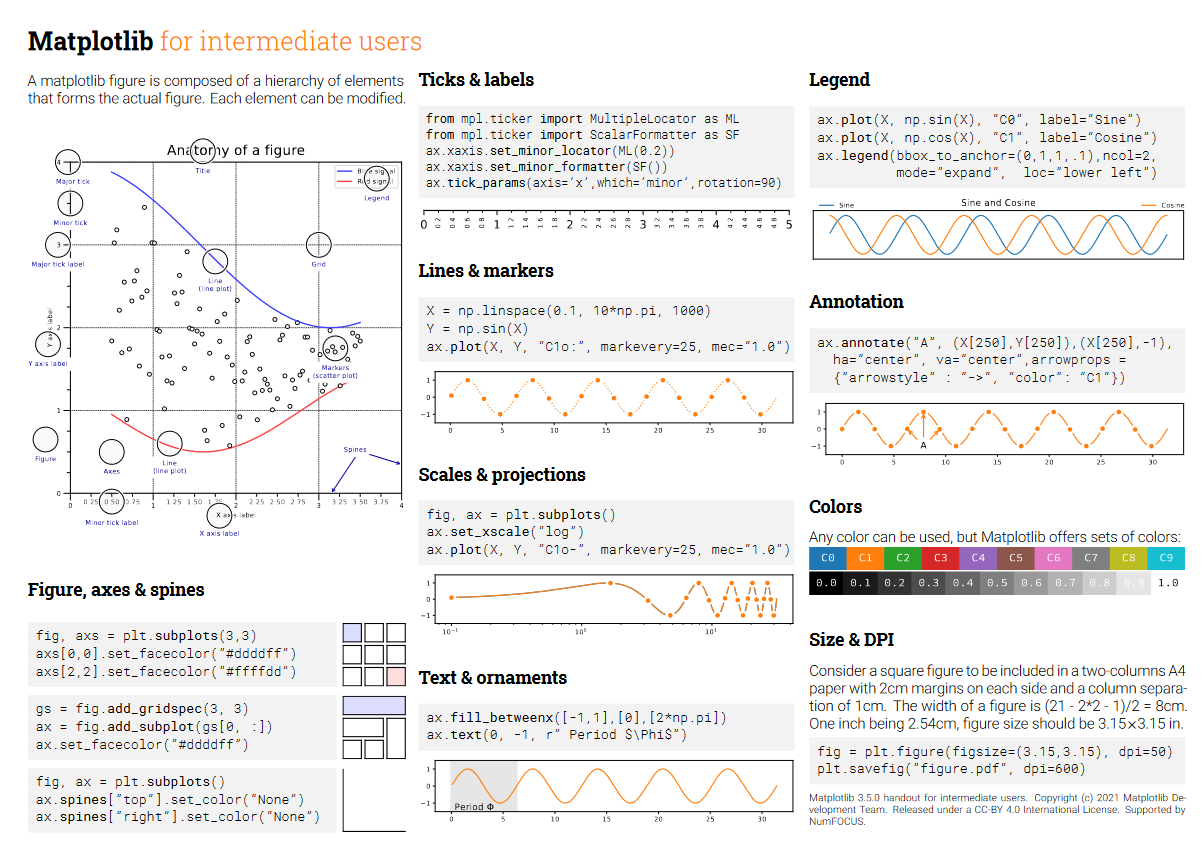
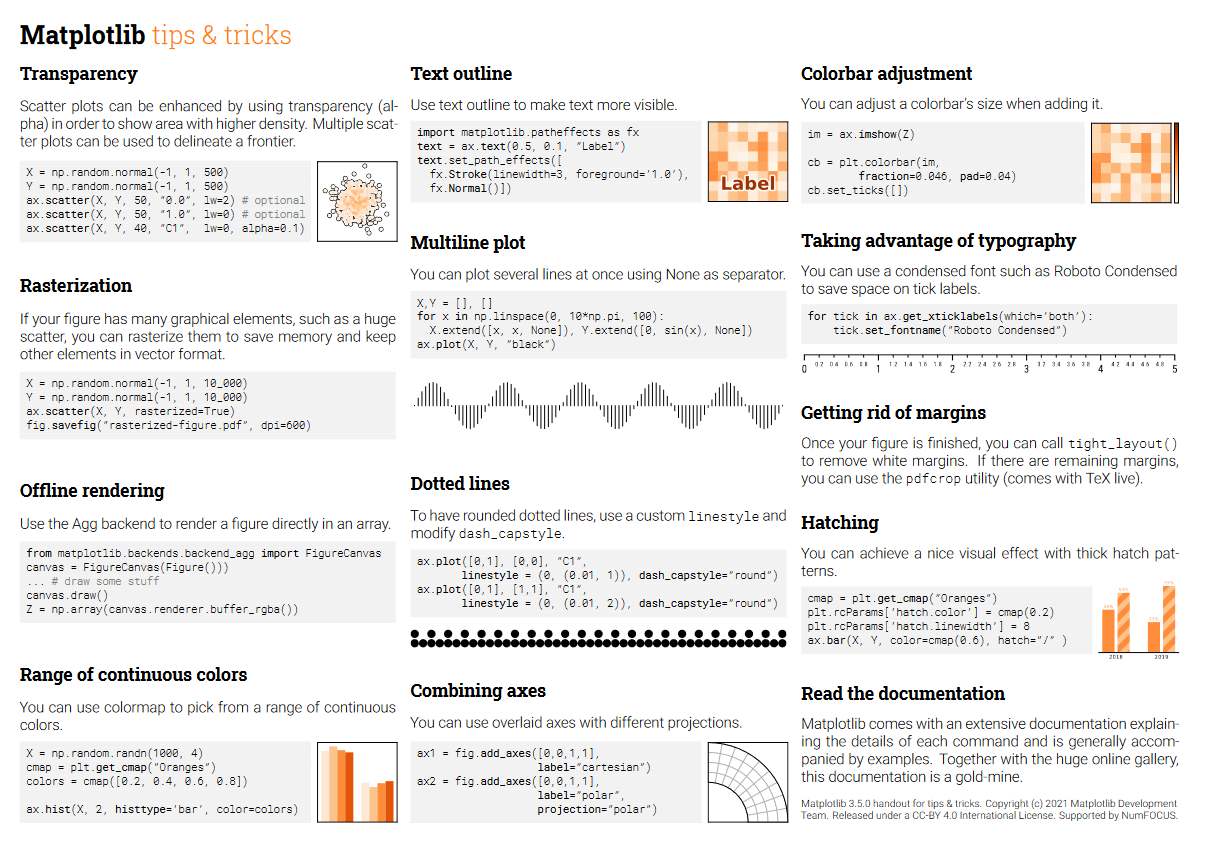

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

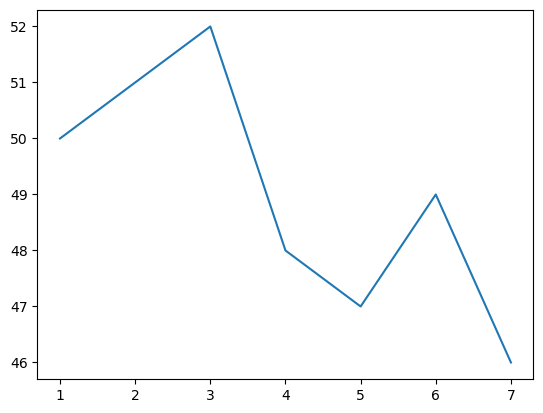

In [3]:
x= [1,2,3,4,5,6,7]
y=[50,51,52,48,47,49,46]

plt.plot(x,y)

In [5]:
df = pd.read_csv("Cars.csv")
df

,Index,Make,Model,Year,Color,Price,Mileage
0,1,Toyota,Camry,2018,Blue,20000,35000
1,2,Honda,Civic,2017,Red,18000,45000
2,3,Ford,Focus,2019,White,22000,25000
3,4,Chevrolet,Malibu,2016,Black,19000,50000
4,5,Toyota,Corolla,2017,Silver,17000,40000
...,...,...,...,...,...,...,...
78,79,Ford,Mustang,2018,Yellow,30000,20000
79,80,Chevrolet,Cruze,2019,Blue,20000,30000
80,81,Toyota,Camry,2016,Red,18000,40000
81,82,Honda,Civic,2018,White,21000,35000


# Scatter plot

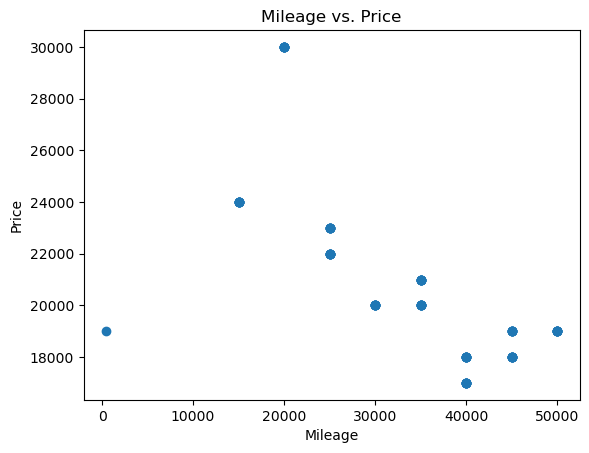

In [8]:
plt.scatter(df['Mileage'], df['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price')

plt.show()

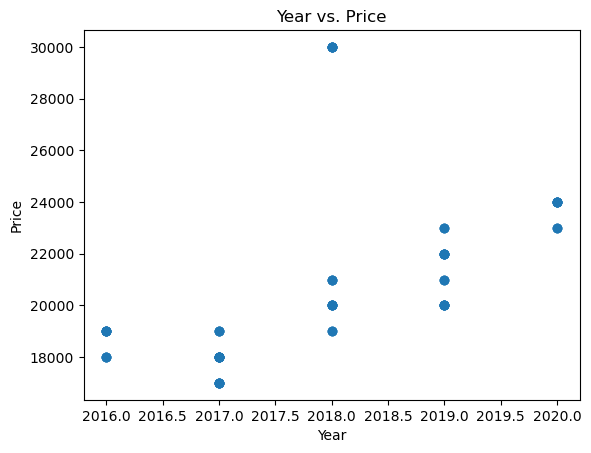

In [10]:
plt.scatter(df['Year'], df['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs. Price')

plt.show()

# Bar chart

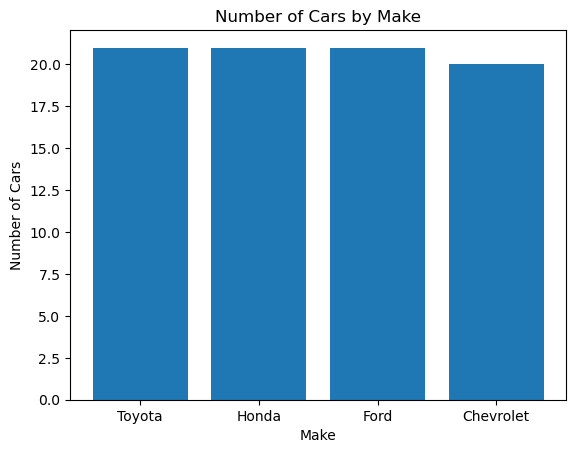

In [12]:
car_counts = df['Make'].value_counts()
plt.bar(car_counts.index, car_counts.values)
plt.xlabel('Make')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Make')

plt.show()

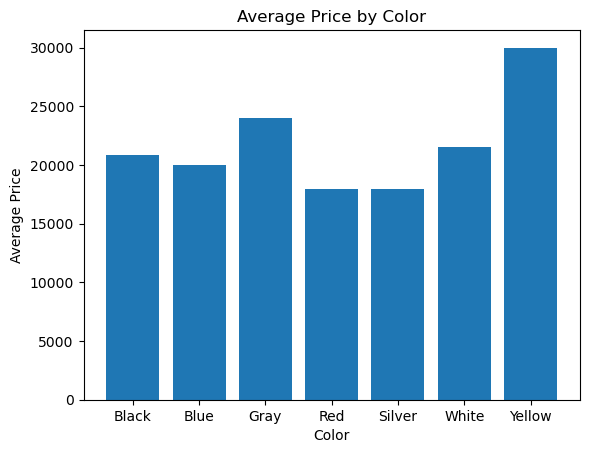

In [13]:
average_price_by_color = df.groupby('Color')['Price'].mean()
plt.bar(average_price_by_color.index, average_price_by_color.values)
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.title('Average Price by Color')

plt.show()

# Histogram

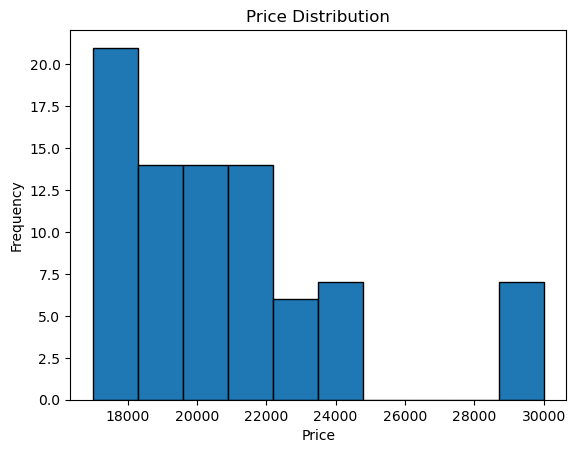

In [15]:
plt.hist(df['Price'], bins=10, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

plt.show()

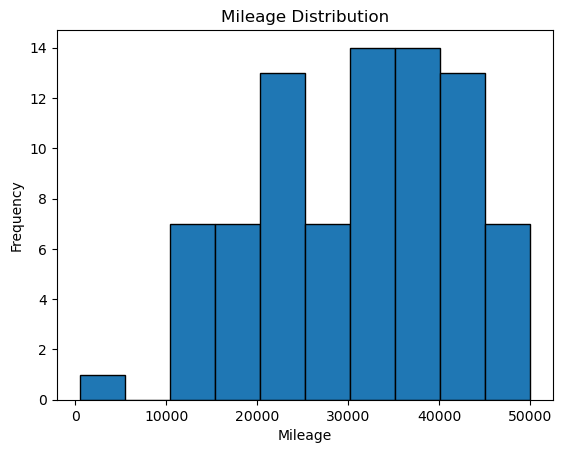

In [17]:
plt.hist(df['Mileage'], bins=10, edgecolor = 'black')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Mileage Distribution')

plt.show()

# Pie chart

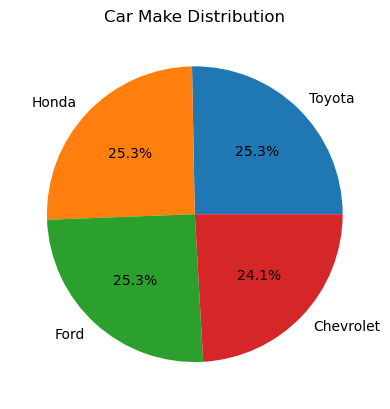

In [18]:
car_make_counts = df['Make'].value_counts()
plt.pie(car_make_counts.values, labels=car_make_counts.index, autopct='%1.1f%%')
plt.title('Car Make Distribution')

plt.show()

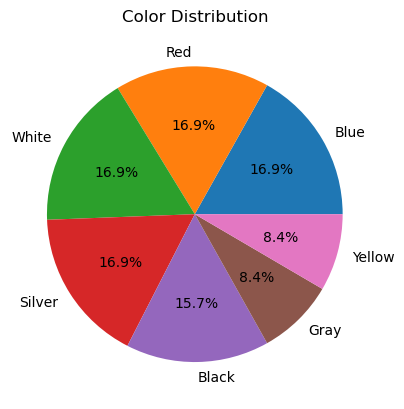

In [19]:
car_color_counts = df['Color'].value_counts()
plt.pie(car_color_counts.values, labels=car_color_counts.index, autopct='%1.1f%%')
plt.title('Color Distribution')

plt.show()

# 2D charts

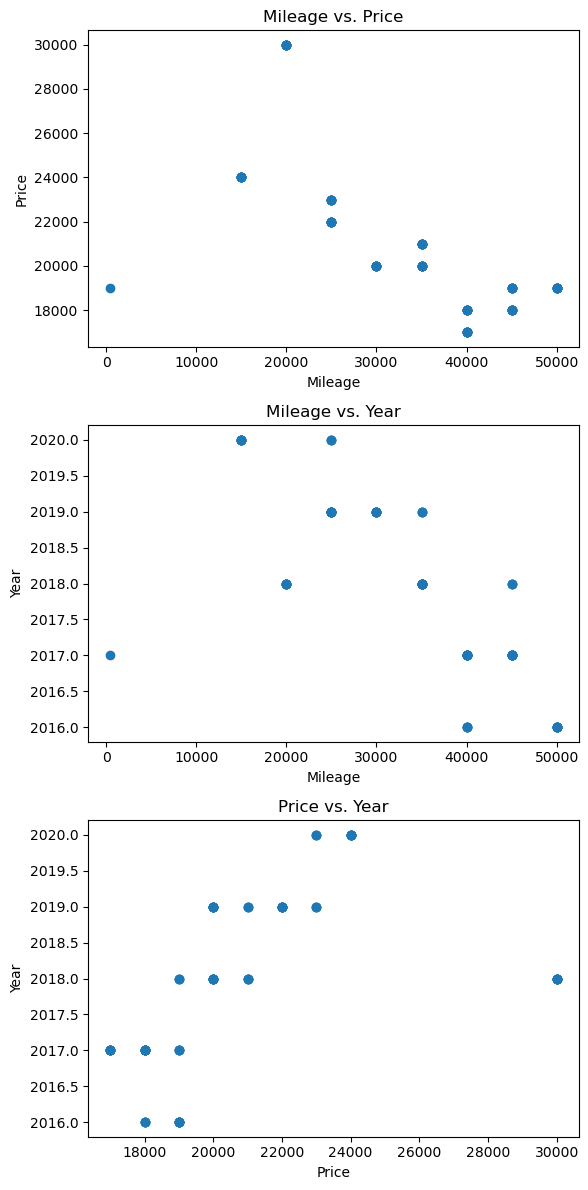

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 12))

# Mileage vs. Price
ax1.scatter(df['Mileage'], df['Price'])
ax1.set_xlabel('Mileage')
ax1.set_ylabel('Price')
ax1.set_title('Mileage vs. Price')

# Mileage vs. Year
ax2.scatter(df['Mileage'], df['Year'])
ax2.set_xlabel('Mileage')
ax2.set_ylabel('Year')
ax2.set_title('Mileage vs. Year')

# Price vs. Year
ax3.scatter(df['Price'], df['Year'])
ax3.set_xlabel('Price')
ax3.set_ylabel('Year')
ax3.set_title('Price vs. Year')

plt.tight_layout()
plt.show()

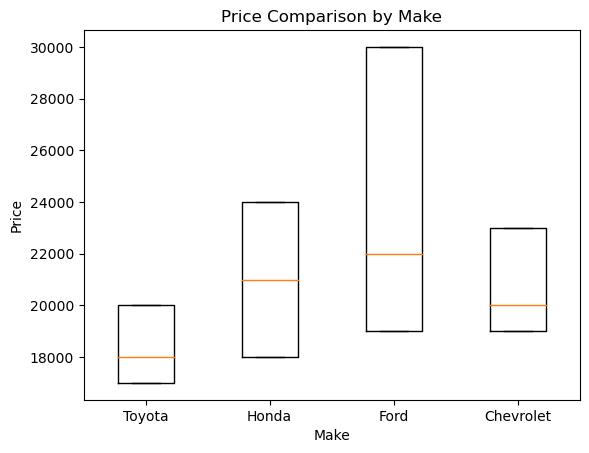

In [22]:
make_list = df['Make'].unique()
price_data = [df[df['Make'] == make]['Price'] for make in make_list]

plt.boxplot(price_data, labels=make_list)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Price Comparison by Make')
plt.show()

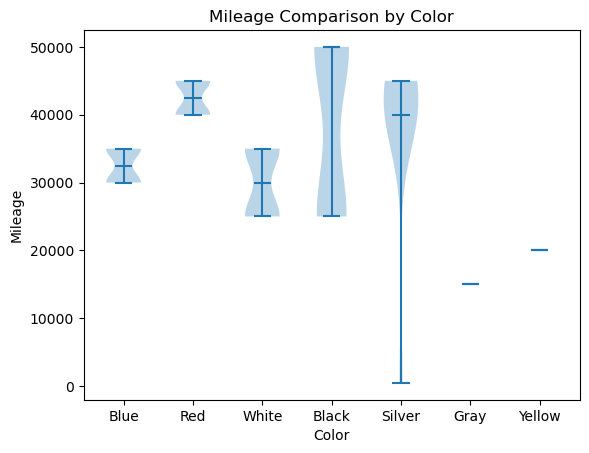

In [23]:
color_list = df['Color'].unique()
mileage_data = [df[df['Color'] == color]['Mileage'] for color in color_list]

plt.violinplot(mileage_data, showmedians=True)
plt.xticks(ticks=range(1, len(color_list) + 1), labels=color_list)
plt.xlabel('Color')
plt.ylabel('Mileage')
plt.title('Mileage Comparison by Color')
plt.show()

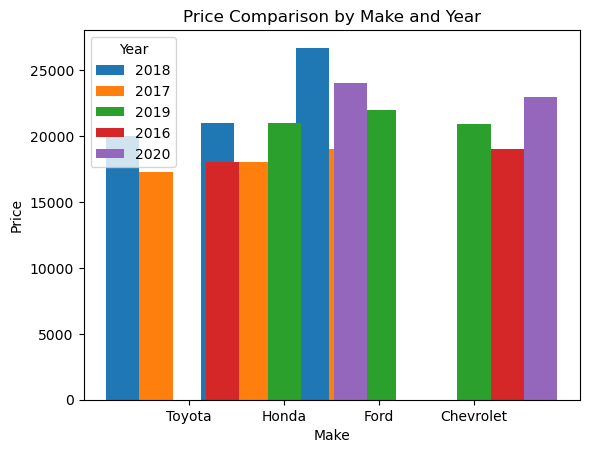

In [26]:
make_list = df['Make'].unique()
year_list = df['Year'].unique()

bar_width = 0.35
index = np.arange(len(make_list))

for i, year in enumerate(year_list):
    price_data = [df[(df['Make'] == make) & (df['Year'] == year)]['Price'].mean() for make in make_list]
    plt.bar(index + i * bar_width, price_data, width=bar_width, label=year)

plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Price Comparison by Make and Year')
plt.xticks(index + bar_width * (len(year_list) - 1) / 2, make_list)
plt.legend(title='Year')
plt.show()

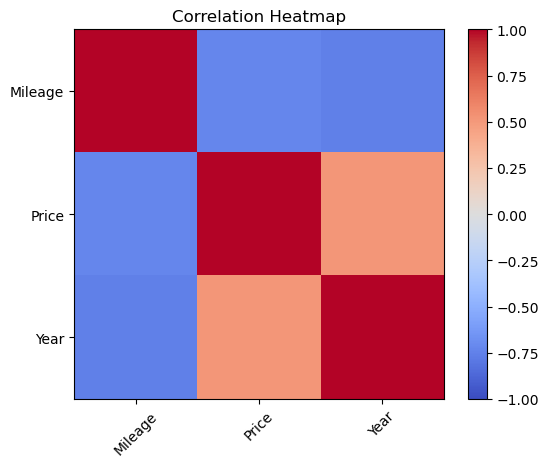

In [27]:
correlation_matrix = df[['Mileage', 'Price', 'Year']].corr()

plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()